[(100, {20: 0.002512632, 8: 0.001321408, 4: 0.000598121, 50: 0.00573773}), (400, {50: 0.036634749, 8: 0.00744948, 20: 0.015298959, 4: 0.002722516}), (900, {100: 0.167987676, 50: 0.079990691, 4: 0.009019544, 20: 0.034790531, 8: 0.018541039}), (1600, {8: 0.028380851, 20: 0.057188181, 50: 0.163110731, 100: 0.321488526, 4: 0.009526525})]


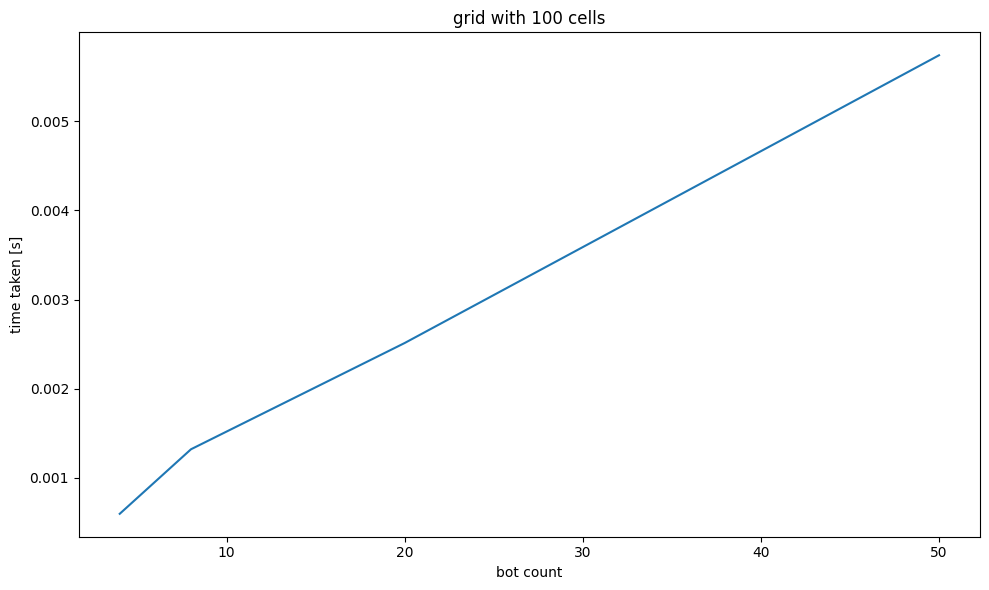

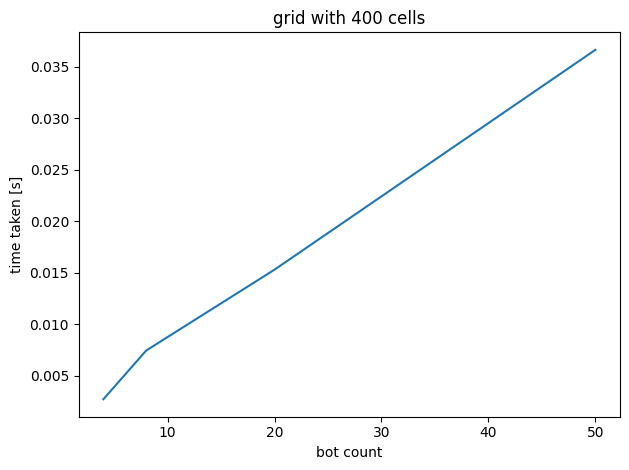

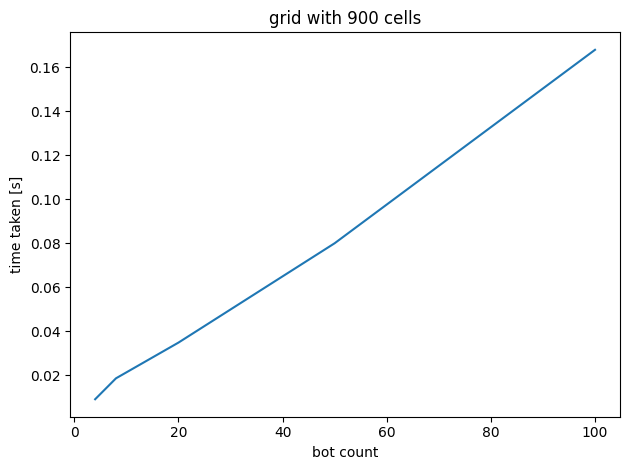

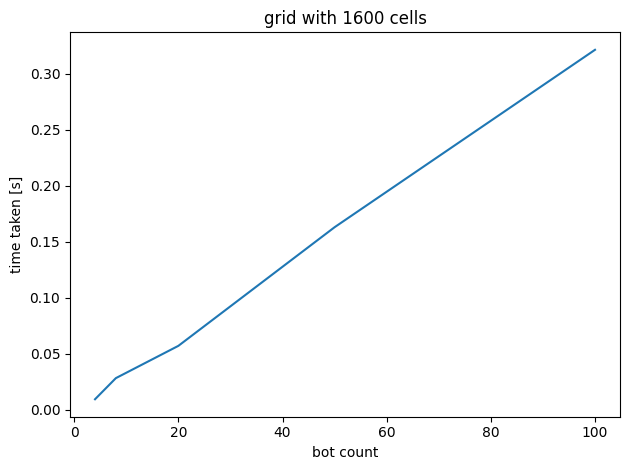

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import re
import glob

header_re = re.compile("^\\((.+)\\) \\[([0-9]+)s([0-9]+)ns\\]: (.+)$")
time_over_cell_count = {};
logfiles = glob.glob("log-*");
for filename in logfiles:
    with open(filename) as log:
      for line in log.readlines():
        tag, seconds, nanoseconds, rest = header_re.search(line).groups()
        time = float(seconds) + float(nanoseconds)/1e9
        if tag == 'Timing':
            # sample: (Timing) [26s519781252ns]: recalculating the bot paths took 5s608675820ns for 256 bots on a grid with 10000
            seconds, nanos, bot_count, cell_count = \
              re.search("recalculating the bot paths took (.+)s(.+)ns for (.+) bots on a grid with (.+)", rest)\
                .groups();
            cell_count = int(cell_count);
            bot_count = int(bot_count);
            if cell_count not in time_over_cell_count:
                time_over_cell_count[cell_count] = {};
            time_over_cell_count[cell_count][bot_count] = float(seconds)+float(nanos)/1e9;

plt.figure(figsize=(10,6))

items = list(time_over_cell_count.items())
items.sort(key=lambda x: x[0]);

print(items)

for trace in items:
    trace_items = list(trace[1].items());
    trace_items.sort(key=lambda x: x[0]);
    xs = [float(item[0]) for item in trace_items]
    vs = [float(item[1]) for item in trace_items]
    plt.plot(xs, vs)#, 'time taken')

    plt.xlabel("bot count")
    plt.ylabel("time taken [s]")
    plt.title("grid with {} cells".format(trace[0]))
    plt.tight_layout()
    plt.show()


Para esse algoritmo (o de floodfill/BFS), a complexidade esperada é de O(n*m), onde n é a largura da grade e m é a altura.

